In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext sql

In [3]:
%sql sqlite:///results.db

# Raw dataset

In [16]:
%sql select count(*) as number_of_files from file

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_files
844140


In [17]:
%sql select count(*) as number_of_repos from repo

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_repos
304361


In [22]:
%sql create index file_name_idx on file (name)

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


[]

In [23]:
%sql select name, count(*) from file group by name order by count(*) desc limit 50

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


name,count(*)
.bashrc,52629
.zshrc,41962
bashrc,18628
zshrc,16948
config.sub,14791
.bash_profile,12190
once-as-vagrant.sh,9577
config.charset,8119
aliases.zsh,7815
config.status,7746


# Removing SHA duplicates

We want to count bit-for-bit identical files only once.

In [24]:
%sql delete from file where file_id not in (select min(file_id) from file group by sha)

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
471324 rows affected.


[]

In [25]:
%sql delete from repo where repo_id not in (select repo_id from file)

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
99235 rows affected.


[]

In [26]:
%sql select count(*) as number_of_files from file

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_files
372816


In [27]:
%sql select count(*) as number_of_repos from repo

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_repos
205126


In [28]:
%sql select name, count(*) from file group by name order by count(*) desc limit 50

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


name,count(*)
.zshrc,40996
.bashrc,39955
zshrc,16391
bashrc,15245
.bash_profile,11274
aliases.zsh,5783
config.status,5518
.bash_aliases,4109
bash_profile,3457
install.sh,3185


# After parsing
These following steps can only be executed after the parsing script has been applied to the database.

In [30]:
%sql delete from file where file_id not in (select file_id from alias)

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
178598 rows affected.


[]

In [31]:
%sql delete from repo where repo_id not in (select repo_id from file)

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
67014 rows affected.


[]

In [32]:
%sql select count(*) as number_of_files from file

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_files
194218


In [33]:
%sql select count(*) as number_of_repos from repo

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_repos
138112


In [34]:
%sql select name, count(*) from file group by name order by count(*) desc limit 50

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


name,count(*)
.bashrc,37609
.zshrc,29917
bashrc,14201
zshrc,12234
.bash_profile,9901
aliases.zsh,5712
.bash_aliases,4072
bash_profile,3126
aliases.sh,2706
.profile,2202


sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


<AxesSubplot:title={'center':'distribution of sampled files'}, xlabel='file size (bytes)', ylabel='count'>

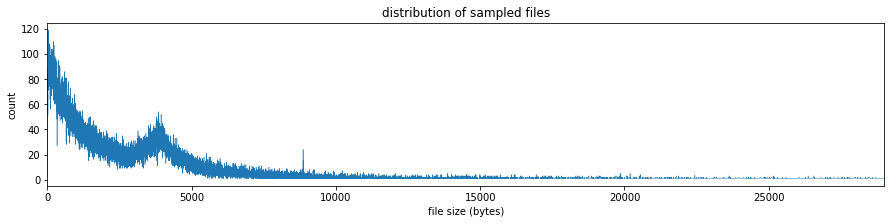

In [51]:
file_sizes = %sql select size, count(*) from file group by size order by size asc
file_sizes.DataFrame().set_index('size').plot(
    linewidth=0.5, legend=False, figsize=(15,3), 
    xlim=(0, 29000),
    xlabel='file size (bytes)',
    ylabel='count',
    title='distribution of sampled files'
)


In [52]:
%sql select count(*) as number_of_aliases from alias

sqlite:///../data.tmp/results_unparsed.db
 * sqlite:///results.db
Done.


number_of_aliases
2204199
